In [ ]:
!python --version

Python 3.10.12


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error

In [2]:
dfResults = pd.read_excel("corridasCompiladas.xlsx",sheet_name="Results")
dfMelting = pd.read_excel("corridasPontosMelting.xlsx",sheet_name="Planilha1")

In [3]:
dfResults = dfResults[dfResults['Corrida'] >=6]

In [4]:
dfResultsFiltrado = dfResults[["Concatenado", "Result"]]

In [5]:
dfResultsFiltrado.shape

(1724, 2)

In [6]:
dfResultsFiltrado.isnull().sum()

Concatenado    0
Result         0
dtype: int64

In [7]:
dfResultsFiltrado.value_counts("Result")


Result
1.0    634
2.0    560
0.0    530
dtype: int64

In [8]:
print(dfMelting)

        Well Well Position  Reading Number          Target  Temperature  \
0        241            K1               1  Orf7a_244del_S    60.000702   
1        241            K1               2  Orf7a_244del_S    60.183220   
2        241            K1               3  Orf7a_244del_S    60.365738   
3        241            K1               4  Orf7a_244del_S    60.548256   
4        241            K1               5  Orf7a_244del_S    60.730778   
...      ...           ...             ...             ...          ...   
336642   383           P23             187           ORF7A    94.105865   
336643   383           P23             188           ORF7A    94.289230   
336644   383           P23             189           ORF7A    94.472595   
336645   383           P23             190           ORF7A    94.655952   
336646   383           P23             191           ORF7A    94.839317   

        Fluorescence    Derivative Pareamento  corrida   Concatenado  
0       1.788077e+06  43108.

In [9]:
# Adicionando uma coluna numerada para cada "Concatenado"
dfMelting['Observation'] = dfMelting.groupby('Concatenado').cumcount() + 1

# Criando o novo DataFrame usando pivot
df_pivot = dfMelting.pivot(index='Concatenado', columns='Observation', values='Derivative')

# Renomeando as colunas do novo DataFrame
df_pivot.columns = [f'{col}' for col in df_pivot.columns];df_pivot

,1,2,3,4,5,6,7,8,9,10,...,183,184,185,186,187,188,189,190,191,192
Concatenado,,,,,,,,,,,,,,,,,,,,,
100B12,6244.530273,5985.892090,5558.014160,4880.710449,3940.082520,2814.430420,1670.723755,718.510803,127.466446,-49.614937,...,-1491.660156,-1397.029175,-1041.571533,-519.686096,1.462337,384.953522,491.011017,328.246033,-12.064639,NaN
100B6,2126.681152,2116.000488,1954.089600,1623.631836,1172.146851,690.217407,269.392517,-33.909645,-248.570465,-344.812561,...,59.495438,259.668396,354.776855,378.448975,371.307312,372.070801,410.650818,497.812317,619.341248,NaN
100B8,1355.512329,1453.574219,1521.242065,1513.145752,1382.569702,1106.461792,714.581299,298.084106,6.137222,-65.920662,...,640.722168,929.169678,1074.213135,1141.710693,1230.516479,1435.667358,1804.761108,2312.871582,2877.190186,NaN
100D10,1531.931641,1648.413818,1607.218872,1362.701172,923.369873,349.347534,-104.487617,-373.260559,-527.753723,-520.432495,...,155.964966,-149.312073,-440.320068,-700.612732,-899.526367,-1036.575073,-1129.351318,-1201.996094,-1277.972656,NaN
100D12,1982.949707,1796.792480,1629.898193,1470.516724,1315.312012,1173.746460,1055.072021,948.365479,817.318970,620.825500,...,-807.494202,-97.163521,477.191681,990.902100,1424.489624,1670.809937,1713.679810,1630.162964,1540.086792,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942850382G22,28077.410156,28637.644531,29281.681641,29972.029297,30669.261719,31346.896484,31989.300781,32577.822266,33083.542969,33478.441406,...,112.183594,211.783203,277.146484,292.998047,258.281250,188.582031,112.167969,58.394531,44.179688,67.521484
942850383I22,11883.987305,12306.433594,12733.787109,13181.039062,13604.491211,13975.021484,14290.143555,14568.261719,14830.858398,15088.726562,...,124.102539,70.882812,10.011719,-54.962891,-120.329102,-176.579102,-210.328125,-213.237305,-189.875977,-156.830078
942850384K22,28015.285156,28291.005859,28624.384766,29002.662109,29419.265625,29873.369141,30253.644531,30626.085938,30939.236328,31136.125000,...,175.453125,-20.476562,-208.472656,-326.562500,-341.062500,-264.072266,-145.386719,-45.757812,-8.669922,-45.611328


In [10]:
df_merged = pd.merge(dfResultsFiltrado, df_pivot, on='Concatenado', how='left')

In [11]:
df_merged.head()

,Concatenado,Result,1,2,3,4,5,6,7,8,...,183,184,185,186,187,188,189,190,191,192
0,6232126895K1,1.0,43108.074219,43483.828125,43797.429688,44118.382812,44423.164062,44705.511719,44966.234375,45196.660156,...,280.949219,444.113281,554.414062,604.300781,603.527344,567.925781,514.855469,463.792969,434.703125,441.195312
1,644000025_C1K2,1.0,51812.730469,51833.792969,51912.429688,52044.371094,52239.273438,52498.074219,52785.316406,53031.214844,...,537.687500,497.886719,473.320312,465.144531,461.953125,447.695312,412.492188,359.179688,301.621094,256.109375
2,6232131030K3,2.0,6808.614746,6900.960938,7032.685547,7180.501953,7304.520508,7361.542969,7325.770508,7206.491211,...,2336.862305,2420.263916,2558.767090,2724.641113,2880.835693,3002.016602,3089.471191,3169.668213,3276.498535,3428.960938
3,644000039_B1K4,1.0,57641.273438,57634.781250,57831.859375,58096.843750,58282.347656,58279.839844,58044.070312,57582.707031,...,820.492188,741.128906,681.804688,639.292969,593.550781,523.480469,422.132812,302.128906,188.468750,103.925781
4,6232134470K5,1.0,32731.341797,32856.218750,33027.015625,33229.945312,33442.039062,33632.585938,33771.640625,33838.441406,...,680.654297,738.841797,799.318359,818.716797,766.843750,638.623047,455.421875,256.746094,85.324219,-29.087891


In [12]:
df_merged.shape

(1724, 194)

In [13]:
df_merged.isnull().sum()

Concatenado      0
Result           0
1                0
2                0
3                0
              ... 
188              0
189              0
190              0
191              0
192            475
Length: 194, dtype: int64

In [14]:
df_merged[pd.isna(df_merged['192'])]

,Concatenado,Result,1,2,3,4,5,6,7,8,...,183,184,185,186,187,188,189,190,191,192
1249,1042850001A - A1A1,1.0,21619.042969,22125.083984,22779.375000,23587.912109,24498.945312,25410.580078,26208.164062,26815.757812,...,-899.037109,-950.404297,-858.322266,-667.812500,-451.419922,-280.972656,-204.138672,-231.205078,-335.828125,NaN
1250,1044000451 - A2A2,1.0,27698.562500,28753.279297,30134.250000,31798.113281,33619.421875,35445.218750,37139.585938,38605.738281,...,404.515625,350.449219,240.898438,92.824219,-64.199219,-194.796875,-272.082031,-291.406250,-272.296875,NaN
1251,1042850011A - C2A3,0.0,37732.859375,38434.902344,39320.667969,40309.367188,41279.519531,42083.210938,42702.777344,43081.058594,...,169.031250,229.058594,290.597656,389.550781,539.539062,724.449219,910.066406,1064.843750,1176.023438,NaN
1252,1044000459 - A3A4,1.0,51407.015625,51715.347656,52162.695312,52683.695312,53199.847656,53644.007812,53973.941406,54169.906250,...,340.621094,394.562500,396.664062,328.960938,210.054688,85.222656,-0.566406,-28.425781,-12.105469,NaN
1253,1042850019A - C3A5,2.0,6480.110840,6732.647949,7084.858887,7587.672852,8251.320312,9034.104492,9853.344727,10613.989258,...,32.509766,-21.114258,-64.074219,-56.292969,21.405273,150.056641,282.926758,374.922852,407.595703,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,110149_24995600P15,2.0,24967.685547,26021.644531,27199.902344,28459.201172,29741.570312,30997.646484,32260.771484,33582.386719,...,-47.224609,-150.478516,-266.960938,-352.558594,-371.830078,-317.160156,-214.005859,-106.914062,-35.058594,NaN
1720,110149_25084000P17,2.0,27697.652344,28878.525391,30205.556641,31644.378906,33131.453125,34598.117188,35993.585938,37285.863281,...,-222.984375,-219.058594,-164.074219,-44.664062,120.316406,281.074219,381.054688,387.964844,310.406250,NaN
1721,110149_25134200P19,1.0,31804.355469,32357.423828,33089.902344,33954.937500,34861.179688,35713.753906,36455.375000,37080.253906,...,-230.792969,-49.058594,126.421875,239.281250,257.683594,188.265625,70.015625,-46.808594,-123.398438,NaN
1722,110149_25394400P21,2.0,26719.214844,27984.175781,29438.035156,31033.113281,32669.558594,34237.535156,35664.410156,37209.570312,...,-110.722656,-95.363281,-1.855469,149.214844,310.519531,427.113281,463.964844,424.792969,347.953125,NaN


In [15]:
df_merged = df_merged.drop(columns=['192'])

In [16]:
# Separando a coluna "Result" para a variável y
y = df_merged['Result']

# Separando o restante do DataFrame para a variável X
X = df_merged.drop(['Concatenado', 'Result'], axis=1)



In [17]:
# BE.9: 0
# Não BE.9: 1
# Inconclusivo: 2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
# X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(
#     X_normalized, y, random_state=0)

In [18]:
# Criando um objeto MinMaxScaler
scaler = MinMaxScaler()
# Aplicando a normalização aos dados X
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [19]:
# Balancear o dataset já que tem muito mais dado de conclusivo do que inconclusivo

under_sampler = RandomUnderSampler(random_state=42)
# X_res, y_res = under_sampler.fit_resample(X_train, y_train)
# X_res_test, y_res_test = under_sampler.fit_resample(X_test, y_test)

X_res_normalized, y_res_normalized = under_sampler.fit_resample(X_train_normalized, y_train)
# X_res_test_normalized, y_res_test_normalized = under_sampler.fit_resample(X_test_normalized, y_test_normalized)


In [20]:
# SVM

# Criando um modelo SVM para classificação
svm_model = SVC(kernel='linear')  # Você pode escolher diferentes kernels (por exemplo, 'linear', 'rbf', 'poly', etc.)
# 'C': 100, 'degree': 3, 'kernel': 'linear'
# Treinando o modelo
svm_model.fit(X_res_normalized, y_res_normalized)

# Fazendo previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test_normalized)


In [21]:
# Regressão logística

# Criando um modelo de Regressão Logística
logistic_model = LogisticRegression()

# Treinando o modelo
logistic_model.fit(X_res_normalized, y_res_normalized)

# Fazendo previsões no conjunto de teste
y_pred_reg = logistic_model.predict(X_test_normalized)


In [22]:
# GradientBoosting

from xgboost import XGBClassifier

model = XGBClassifier(n_jobs = -1)
# fit the model on the whole dataset
model.fit(X_res_normalized, y_res_normalized)

y_pred_gb = model.predict(X_test_normalized)


In [24]:
# SVM

print('Precision score %s' % precision_score(y_test, y_pred_svm, average=None))
print('Recall score %s' % recall_score(y_test, y_pred_svm, average=None))
print('F1-score score %s' % f1_score(y_test, y_pred_svm, average=None))
print('Accuracy score %s' % accuracy_score(y_test, y_pred_svm))

Precision score [0.98360656 0.96969697 0.95138889]
Recall score [0.97560976 0.97560976 0.95138889]
F1-score score [0.97959184 0.97264438 0.95138889]
Accuracy score 0.9675174013921114


In [25]:
# Regressão logística

print('Precision score %s' % precision_score(y_test, y_pred_reg, average=None))
print('Recall score %s' % recall_score(y_test, y_pred_reg, average=None))
print('F1-score score %s' % f1_score(y_test, y_pred_reg, average=None))
print('Accuracy score %s' % accuracy_score(y_test, y_pred_reg))

Precision score [1.         0.9695122  0.92666667]
Recall score [0.95121951 0.9695122  0.96527778]
F1-score score [0.975      0.9695122  0.94557823]
Accuracy score 0.962877030162413


In [26]:
# GradientBoosting

print('Precision score %s' % precision_score(y_test, y_pred_gb, average=None))
print('Recall score %s' % recall_score(y_test, y_pred_gb, average=None))
print('F1-score score %s' % f1_score(y_test, y_pred_gb, average=None))
print('Accuracy score %s' % accuracy_score(y_test, y_pred_gb))

Precision score [0.98347107 0.97515528 0.9261745 ]
Recall score [0.96747967 0.95731707 0.95833333]
F1-score score [0.97540984 0.96615385 0.94197952]
Accuracy score 0.9605568445475638


In [27]:
# Criar um dicionário com os resultados
results = {
    'Algorithm': ['SVM', 'Logistic Regression', 'GradientBoosting'],
    'Precision': [
        precision_score(y_test, y_pred_svm, average='micro'),
        precision_score(y_test, y_pred_reg, average='micro'),
        precision_score(y_test, y_pred_gb, average='micro')
    ],
    'Recall': [
        recall_score(y_test, y_pred_svm, average='micro'),
        recall_score(y_test, y_pred_reg, average='micro'),
        recall_score(y_test, y_pred_gb, average='micro')
    ],
    'F1-score': [
        f1_score(y_test, y_pred_svm, average='micro'),
        f1_score(y_test, y_pred_reg, average='micro'),
        f1_score(y_test, y_pred_gb, average='micro')
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_reg),
        accuracy_score(y_test, y_pred_gb)
    ]
}

# Criar um DataFrame a partir do dicionário
df_results = pd.DataFrame(results)

# Exibir a tabela
# print(df_results)

df_results.to_csv('comparacaoAlgoritmos.tsv',sep='\t',index=False)

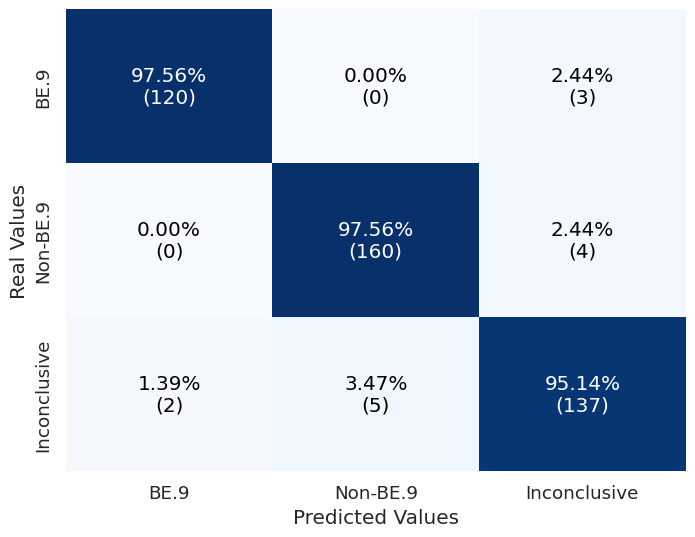

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["BE.9", "Non-BE.9", "Inconclusive"]

conf_matrix = confusion_matrix(y_test, y_pred_svm)
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)

# Configuração do gráfico
class_names = labels
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=False, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if conf_matrix_percent[i, j] > 0.7:
          color = "white"
        else:
          color="black"
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2%}\n({conf_matrix[i, j]})", ha="center", va="center", color=color)

plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
# plt.title('Matriz de Confusão Multiclasse')
plt.savefig('MatrizConfusao.png', dpi=300)
plt.show()

In [33]:
# Criando um modelo de Regressão Logística
logistic_model = LogisticRegression(solver='liblinear')

# Definindo os parâmetros que você deseja testar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, scoring='neg_mean_squared_error', cv=StratifiedKFold(n_splits=5), verbose=1, n_jobs=-1)

# Executando a busca em grade
grid_search.fit(X_res_normalized, y_res_normalized)

# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print(f'Melhores parâmetros: {best_params}')

# Melhor modelo encontrado após a busca em grade
best_model = grid_search.best_estimator_

# Avaliando o modelo no conjunto de teste
y_pred = best_model.predict(X_test_normalized)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error no conjunto de teste: {mse}')


# Regressão logística

print('Precision score %s' % precision_score(y_test, y_pred, average='micro'))
print('Recall score %s' % recall_score(y_test, y_pred, average='micro'))
print('F1-score score %s' % f1_score(y_test, y_pred, average='micro'))
print('Accuracy score %s' % accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Melhores parâmetros: {'C': 1000, 'penalty': 'l2'}
Mean Squared Error no conjunto de teste: 0.037122969837587005
Precision score 0.9698375870069605
Recall score 0.9698375870069605
F1-score score 0.9698375870069605
Accuracy score 0.9698375870069605


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

# Criando um DataFrame para armazenar os resultados
resultados_df = pd.DataFrame(columns=['Parâmetros', 'MSE', 'Precision', 'Recall', 'F1', 'Accuracy'])

# Configuração padrão do SVM
svm_model_padrao = SVC()
svm_model_padrao.fit(X_res_normalized, y_res_normalized)
y_pred_padrao = svm_model_padrao.predict(X_test_normalized)

# Avaliando o modelo padrão no conjunto de teste
mse_padrao = mean_squared_error(y_test, y_pred_padrao)
precision_padrao = precision_score(y_test, y_pred_padrao, average='micro')
recall_padrao = recall_score(y_test, y_pred_padrao, average='micro')
f1_padrao = f1_score(y_test, y_pred_padrao, average='micro')
accuracy_padrao = accuracy_score(y_test, y_pred_padrao)

# Adicionando resultados padrão ao DataFrame
resultados_df = resultados_df.append({
    'Parâmetros': 'Padrão',
    'MSE': mse_padrao,
    'Precision': precision_padrao,
    'Recall': recall_padrao,
    'F1': f1_padrao,
    'Accuracy': accuracy_padrao
}, ignore_index=True)

# Definindo os parâmetros que você deseja testar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.01, 0.1, 1, 'auto'],
    'degree': [2, 3, 4],
}

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=5), verbose=1, n_jobs=-1)

# Executando a busca em grade
grid_search.fit(X_res_normalized, y_res_normalized)

# Iterando sobre todas as combinações de parâmetros testadas
for i, params in enumerate(grid_search.cv_results_['params']):
    # Criando uma instância do modelo SVC com os melhores parâmetros
    best_model = SVC(**params)

    # Treinando o modelo com os melhores parâmetros
    best_model.fit(X_res_normalized, y_res_normalized)

    # Avaliando o melhor modelo no conjunto de teste
    y_pred = best_model.predict(X_test_normalized)
    mse = mean_squared_error(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)

    # Adicionando resultados da busca em grade ao DataFrame
    resultados_df = resultados_df.append({
        'Parâmetros': params,
        'MSE': mse,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Accuracy': accuracy
    }, ignore_index=True)

# Salvando os resultados em um arquivo Excel
resultados_df.to_excel('resultados_svm.xlsx', index=False)


In [30]:
# SVM

# Criando um modelo SVM para classificação
svm_modelTunned = SVC(kernel='rbf',gamma="auto", degree=2, C=100)  # Você pode escolher diferentes kernels (por exemplo, 'linear', 'rbf', 'poly', etc.)
# 'C': 100, 'degree': 3, 'kernel': 'linear'
# Treinando o modelo
svm_modelTunned.fit(X_res_normalized, y_res_normalized)

# Fazendo previsões no conjunto de teste
y_pred_svmTunned = svm_modelTunned.predict(X_test_normalized)

In [31]:
# SVM

print('Precision score %s' % precision_score(y_test, y_pred_svmTunned, average=None))
print('Recall score %s' % recall_score(y_test, y_pred_svmTunned, average=None))
print('F1-score score %s' % f1_score(y_test, y_pred_svmTunned, average=None))
print('Accuracy score %s' % accuracy_score(y_test, y_pred_svmTunned))

Precision score [0.98360656 0.97560976 0.95172414]
Recall score [0.97560976 0.97560976 0.95833333]
F1-score score [0.97959184 0.97560976 0.9550173 ]
Accuracy score 0.9698375870069605


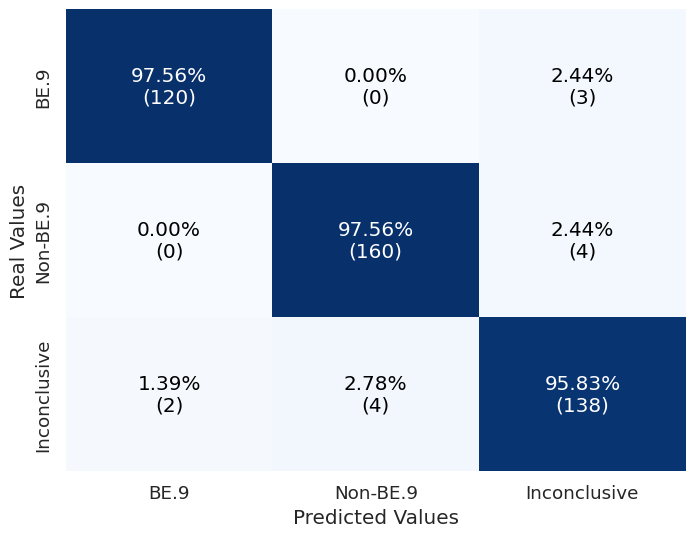

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["BE.9", "Non-BE.9", "Inconclusive"]

conf_matrix = confusion_matrix(y_test, y_pred_svmTunned)
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)

# Configuração do gráfico
class_names = labels
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=False, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, cbar=False)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if conf_matrix_percent[i, j] > 0.7:
          color = "white"
        else:
          color="black"
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2%}\n({conf_matrix[i, j]})", ha="center", va="center", color=color)

plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
# plt.title('Matriz de Confusão Multiclasse')
plt.savefig('MatrizConfusaoPos.png', dpi=300)
plt.show()

In [ ]:
import joblib

# Supondo que você tem um modelo chamado 'model'
joblib.dump(model, '/content/drive/MyDrive/Machine Learning/TR/modelo_sybr.joblib')


['/content/drive/MyDrive/Machine Learning/TR/modelo_sybr.joblib']

In [ ]:
model.save_model("/content/drive/MyDrive/Machine Learning/TR/model.json")